In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.colors import LogNorm
from scipy import stats
from scipy import io as spio
from scipy import linalg
from scipy import fftpack
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
from scipy import misc
from scipy import signal

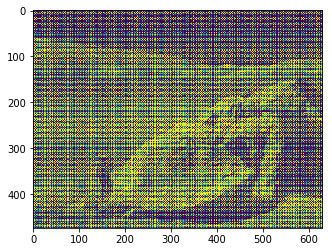

In [2]:
#No1

img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png").astype(float)
plt.figure()
plt.imshow(img)
plt.show()

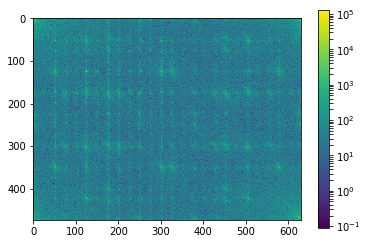

In [3]:
plt.figure()
fftimg = fftpack.fft2(img)
plt.imshow(np.abs(fftimg), norm=LogNorm())
plt.colorbar()
plt.show()

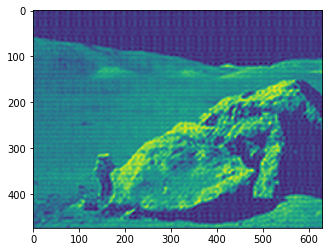

In [4]:
a, b = fftimg.shape
fftimg2 = fftimg
fftimg2[a//10:(a*9)//10]=0
fftimg2[:,b//10:(b*9)//10]=0
img2 = fftpack.ifft2(fftimg2).real.astype(float)
plt.figure()
plt.imshow(img2)
plt.show()

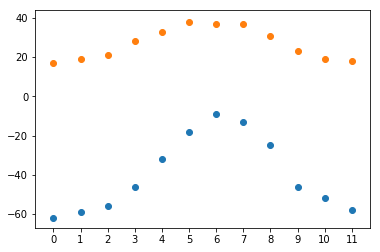

In [5]:
#No2

def fun(t,x,y,dt) :
    return x+np.cos((t+dt)*np.pi/6)*y

temp_min = [-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58]
temp_max = [17,19,21,28,33,38,37,37,31,23,19,18]

a = np.arange(12)
plt.xticks(np.arange(0,12,1))
plt.scatter(a,temp_min)
plt.scatter(a,temp_max)
plt.show()

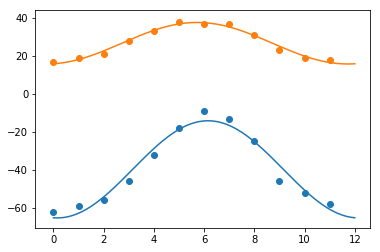

In [6]:
fun_max = optimize.curve_fit(fun,a,temp_max,[-70,40,0])[0]
fun_min = optimize.curve_fit(fun,a,temp_min,[-70,40,0])[0]

plt.figure()
b = np.arange(0,12,12/365)
plt.scatter(a,temp_min)
plt.plot(b,fun(b,*fun_min))
plt.scatter(a,temp_max)
plt.plot(b,fun(b,*fun_max))
plt.show()

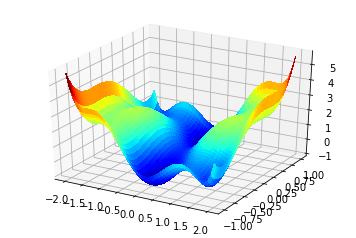

-0.08984140879098376 0.7126560813658822


In [103]:
#No3

def shCf(x):
    return (4-2.1*x[0]*x[0]+x[0]**4/3)*x[0]*x[0]+x[0]*x[1]+(-4+4*x[1]*x[1])*x[1]*x[1]

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
surface = ax.plot_surface(xg, yg, shCf([xg, yg]), rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0, antialiased=False)
plt.show()
xgrid = np.arange(-2,2,1)
ygrid = np.arange(-1,1,1)
result = optimize.minimize(shCf,[(-2,2),(-1,1)])
print(result.x[0], result.x[1])

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


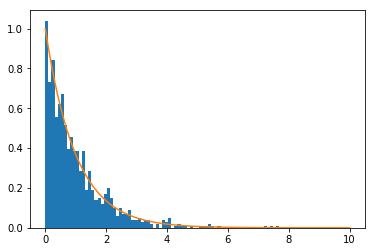

In [101]:
#No4

m = np.random.gamma(1,1,1000)
bins = np.linspace(0,10,100)
pl.hist(m,bins=bins, normed = True)
p = stats.gamma.pdf(bins,1)
pl.plot(bins,p)
pl.show()

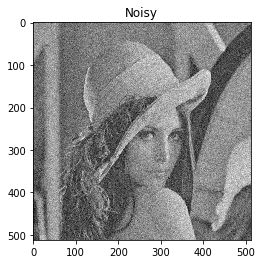

In [10]:
#No5

lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
median_lena = ndimage.median_filter(blurred_lena, size=5)
wiener_lena = signal.wiener(blurred_lena, (5,5))
plt.imshow(noisy_lena,plt.cm.gray)
plt.title('Noisy')
plt.show()

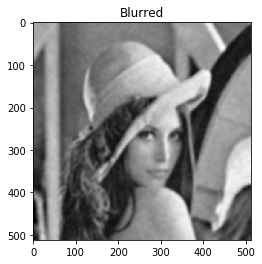

In [11]:
plt.imshow(blurred_lena,plt.cm.gray)
plt.title('Blurred')
plt.show()

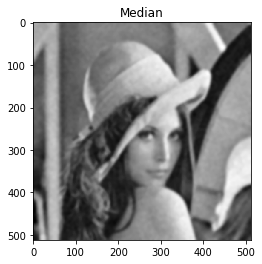

In [12]:
plt.imshow(median_lena,plt.cm.gray)
plt.title('Median')
plt.show()

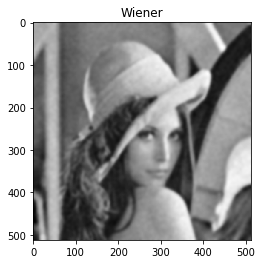

In [13]:
plt.imshow(wiener_lena,plt.cm.gray)
plt.title('Wiener')
plt.show()

In [20]:
#No6

a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1; a[0, 0] = 1
a

array([[1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [22]:
b = ndimage.binary_opening(a).astype(np.int)
b

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

In [23]:
b = ndimage.binary_erosion(a).astype(a.dtype)
b = ndimage.binary_dilation(b).astype(a.dtype)
b

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

In [35]:
#No7

a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
a

array([[ 0.04171832,  0.25357112, -0.15817385, ..., -0.12568511,
        -0.05494736,  0.12887204],
       [ 0.0976323 ,  0.03176274, -0.35988422, ..., -0.1491191 ,
         0.38690836,  0.07024317],
       [ 0.10263293,  0.0124166 , -0.29725022, ..., -0.20332842,
        -0.07123074,  0.12575125],
       ...,
       [-0.41623187, -0.13804236,  0.08477269, ..., -0.16187203,
         0.10901006, -0.34325353],
       [-0.31030098,  0.64912218, -0.06607031, ...,  0.29608766,
        -0.10373294,  0.35359372],
       [-0.20166821,  0.0569006 , -0.03958191, ..., -0.17226287,
         0.05355771,  0.06586263]])

In [27]:
mask = a>=0.5
mask

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [31]:
opened_mask = ndimage.binary_opening(mask)
opened_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
closed_mask = ndimage.binary_closing(opened_mask)
closed_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [42]:
900-np.sum(closed_mask) > 0

True